In [1]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pathlib
rootdir=pathlib.Path().resolve()

In [17]:
# Set the directory where the xvg files are located

# Create an empty list to hold the dataframes
dfs = []
print('The program only works with SASA and Gyrate plots that have the word sasa and gyr inside their names (uppercase or lowercase is not important)')
source = input("Input the full xvg file (eg: rmsd_p100.xvg): ")

# Loop through all the subfolders and find the xvg files
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith(source):
            filepath = os.path.join(subdir, file)
            # Read the xvg file into a pandas dataframe
            name=os.path.basename(subdir)
            if (source.upper().find('RMSF') == -1):
                if (file.upper().find('SASA') != -1):
                    df = pd.read_csv(filepath, sep='\s+', dtype=np.float64, skiprows=24, names=['time',name])
                elif (file.upper().find('GYR') != -1):
                    df = pd.read_csv(filepath, sep='\s+', dtype=np.float64, skiprows=27, names=['time',name,'rx','ry','rz'])
                else:
                    df = pd.read_csv(filepath, sep='\s+', dtype=np.float64, skiprows=18, names=['time',name])
                # Add a column to the dataframe with the name of the subfolder
                if len(dfs)==0:
                    dfs.append(df['time'])
                dfs.append(df[name])
            else:
                df = pd.read_csv(filepath, sep='\s+', dtype=np.float64, skiprows=17, names=['time',name])
                if len(dfs)==0:
                    dfs.append(df['time'])
                dfs.append(df[name])
                

# Concatenate all the dataframes in the list into one
df=pd.DataFrame(dfs)
df=df.T


The program only works with SASA and Gyrate plots that have the word sasa and gyr inside their names (uppercase or lowercase is not important)
Input the full xvg file (eg: rmsd_p100.xvg): rmsf_p100.xvg


In [18]:
# Use seaborn to plot the data
print(df.head)
print(df.columns)
df.to_csv(source.replace('xvg','csv'))
if (source.upper().find('RMSF') == -1):
    df.time=df.time/1000

<bound method NDFrame.head of       time    F347    F370    F369
0      2.0  0.1690  0.1348  0.1641
1      3.0  0.1040  0.0842  0.0950
2      4.0  0.0647  0.0618  0.0690
3      5.0  0.0551  0.0543  0.0653
4      6.0  0.0503  0.0517  0.0584
..     ...     ...     ...     ...
490  492.0  0.0830  0.0918  0.1070
491  493.0  0.0888  0.1035  0.1200
492  494.0  0.0850  0.1067  0.1363
493  495.0  0.0933  0.1119  0.1292
494  496.0  0.1199  0.1314  0.1480

[495 rows x 4 columns]>
Index(['time', 'F347', 'F370', 'F369'], dtype='object')


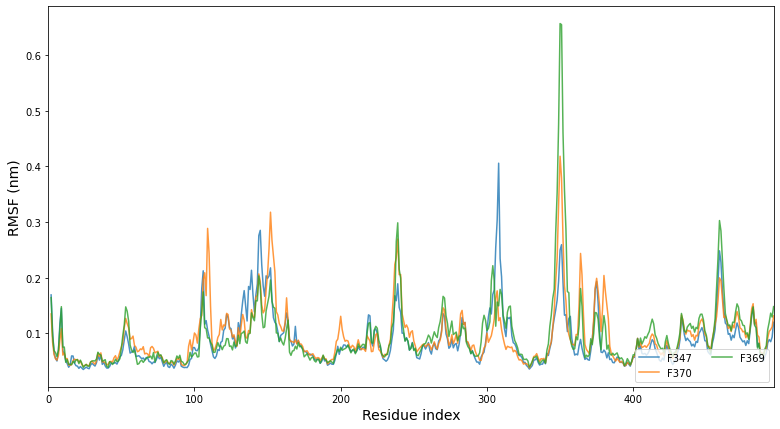

In [24]:
df.plot(x='time',figsize=(13,7),alpha=0.8)
if (source.upper().find('RMSF') == -1):
    plt.xlabel('Time (ns)', fontsize=14)
    if (source.upper().find('SASA') != -1):
        plt.ylabel('SASA (nm$^2$)', fontsize=14)
    elif (source.upper().find('GYR') != -1):
        plt.ylabel('Gyrate (nm)', fontsize=14)
    else:
        plt.ylabel('RMSD (nm)', fontsize=14)    
else:
    plt.xlabel('Residue index', fontsize=14)
    plt.ylabel('RMSF (nm)', fontsize=14)

params = {'axes.labelsize': 18,'axes.titlesize':20,\
          'text.fontsize': 20, 'legend.fontsize': 20, 'xtick.labelsize': 28, 'ytick.labelsize': 40}
plt.xlim(0,df.time.iloc[-1])
plt.legend(ncol=2, loc="lower right")
figure=source.replace('xvg','png')
plt.savefig(figure,bbox_inches='tight')

plt.show()